# 1000 cameras dataset

In the folowing, we will look at the 1000 cameras dataset. The original dataset has been gathered and cleaned up by Petra Isenberg, Pierre Dragicevic and Yvonne Jansen. The dataset is available on Kaggle. 
I want to generate some insights about the different properties - as e.g. Max resolution - of cameras and see how cameras have developed over time. 

First we will import necessary libraries and read in the dataset. After that, we will transform the dataset into a pandas dataframe so it is easier to work with. Then we check for null values in the data and drop them. 

In [2]:
# import libraries
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import qqplot

# read in dataset
camera = pd.read_csv("camera_dataset.csv")

# transform into  pandas dataframe
camera_df = pd.DataFrame(camera)

# check for null values and drop them as these only occur in 2 rows
camera_df.isnull().sum()
camera_drop_zero = camera_df.dropna(axis = 0, how = 'any')

#delete years 1994 and 1995 as there is not much data available
camera_new = camera_drop_zero.drop(camera_drop_zero.index[[0, 1]])

camera_new.head()

print(camera_new.shape)

#check if any null values are left
#print(camera_new.isnull().sum())

#make dataframe that is sorted for date and price, drop 1994 and 1995
camera_sorted = camera_new.sort_values(by = "Release date")
camera_sorted = camera_sorted.drop(camera_sorted.index[[0, 1]])

#print(camera_sorted.isnull().sum())
print(camera_sorted.shape)

#get a broad overview of the data
camera_sorted.describe()


(1034, 13)
(1032, 13)


,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,2003.614341,2475.996124,1780.498062,4.599806,33.009690,121.794574,44.188953,7.777132,17.507752,316.394380,105.197190,459.099806
std,2.686408,757.806089,825.872879,2.840015,10.256549,93.571554,24.118366,8.046226,27.476644,253.673787,24.084057,762.326203
min,1996.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2002.000000,2048.000000,1130.500000,3.000000,35.000000,96.000000,30.000000,3.000000,8.000000,180.000000,92.000000,149.000000
50%,2004.000000,2560.000000,2048.000000,4.000000,36.000000,108.000000,50.000000,6.000000,16.000000,225.000000,101.000000,199.000000
75%,2006.000000,3072.000000,2560.000000,7.000000,38.000000,117.000000,60.000000,10.000000,20.000000,340.000000,115.000000,399.000000
max,2007.000000,5616.000000,4992.000000,21.000000,52.000000,518.000000,120.000000,85.000000,450.000000,1860.000000,240.000000,7999.000000


It is interesting that as min values we have 0 for almost all columns. Whether this is due to unkown values or in fact 0 values in the cameras is not clear. 
We will also look at how many zeros there are per column and at what Release date most of the zero data comes from to see if this comes from some technological development.

Following this, we have a look on the shape of the dataset and the columns. Also we look on the development of price over time.

(1032, 13)
Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price'],
      dtype='object')


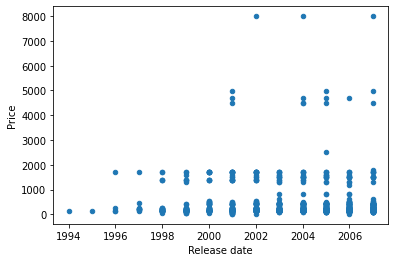

Model                        0
Release date                 0
Max resolution               1
Low resolution              53
Effective pixels            34
Zoom wide (W)               85
Zoom tele (T)               85
Normal focus range         137
Macro focus range          126
Storage included           123
Weight (inc. batteries)     21
Dimensions                  14
Price                        0
dtype: int64


,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight (inc. batteries),Dimensions,Price
Release date,,,,,,,,,,,
1994,0,1,0,1,1,1,1,1,0,0,0
1995,0,1,0,1,1,1,1,1,0,0,0
1996,0,0,4,0,0,0,0,0,0,0,0
1997,0,3,8,0,0,0,0,1,1,0,0
1998,0,4,9,3,3,3,6,3,2,2,0
1999,0,4,9,4,4,8,13,5,4,3,0
2000,0,3,2,4,4,5,6,4,4,4,0
2001,0,6,2,5,5,5,8,5,0,0,0
2002,0,3,0,6,6,8,10,11,2,2,0


In [3]:

#print columns and shape
print(camera_sorted.shape)
print(camera_new.columns)

#list
columns_without_price_date_model = []

#select columns wthout Price, Model and realease date
for column in camera_new.columns :
        if column != "Release date" and column != "Price" and column != "Model":
            columns_without_price_date_model.append(column)

#scatter plot of camera price over time
camera_new.plot(x = "Release date", y = "Price", kind = "scatter")

plt.show()


#counting how many 0 values there are in the columns
print((camera_new == 0).sum(axis=0))

list_of_props = ['Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight (inc. batteries)', 'Dimensions', 'Price']




#looking for 0 valued cameras and from what year they are
grouped_year = camera_new.groupby('Release date')[list_of_props].apply(lambda x: x[x == 0].count())

grouped_year

When looking on the development of prices over time, it is visible, that prices stayed somewhere between 10-2000 Dollar. Only a few cameras are outliers with prices up to 8000 Dollar. 

When looking on the columns of the dataset, we can see that there are 13 columns. In the following I am going to shortly summarize the meaning of these columns : 
- Model: name of the model of the camera
- Release date: date of release of the camera
- Max resolution: highest dimension in pixel
- Low resolution: lowest dimensions in pixel
- Effective pixels:  is a measurement of the number of pixels that actively record the photographic image within a sensor. As an example, a camera might hold a sensor containing 10.5 megapixels, but they have an effective pixel count of 10.2 megapixels.
- Zoom wide (W): zoom wide refers to the ability of a camera to zoom into width. The data refers to the size of the lens in mm. 
- Zoom tele (T): zoom tele refers to the length of the lens and its ability to zoom into distance. The data refers to the size of the lens in mm. The larger Zoom tele is, the higher is the magnification capability of the camera.
- Normal focus range: It refers to the size of normal lens focal lenghts in mm (which is a calculation of an optical distance from the point where light rays converge to form a sharp image of an object to the digital sensor).The shorter the focal length, the wider the angle of view and the lower the magnification.
- Macro focus range: is the nearest distance between the camera and the subject such that the camera can take clear and in-focus shots. It is denominated in mm.
- Storage included: Local camera storage included
- Weight (inc.batteries): weight of the camera including bateries
- Dimensions: Length and width of the camera
- Price: Price of the camera

As we can see from the zero value count there are a lot of cameras that have zero valued properties. As there are a zero values in all years, it is not clear if that is due to newer cameras not having e.g. a lense included or due to the fact that there are less data points in the years before 2000 (as we will later find out).
We will assume that the zero values are indeed zero and are not due to missing data.

Next, it would be interesting to know how the median and mean of camera prices developed over time and also how many cameras per year we have in the dataset.

Release date
1994      1
1995      1
1996      4
1997     10
1998     31
1999     53
2000     61
2001     85
2002     89
2003    101
2004    141
2005    143
2006    152
2007    162
Name: Model, dtype: int64


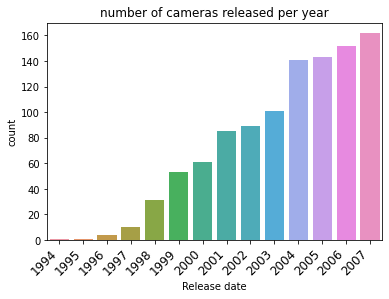

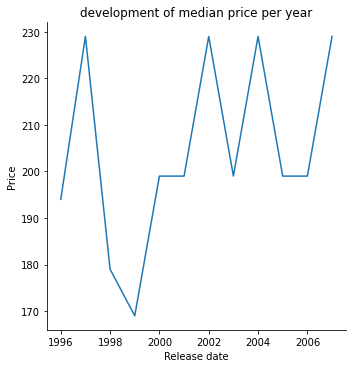

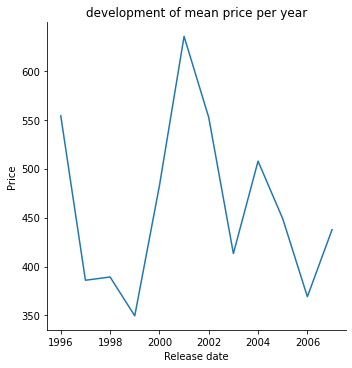

In [4]:
#print how many models per year the dataset has
camera_new_grouped_bydate_copy = camera_new.groupby("Release date")["Model"].count()

print(camera_new_grouped_bydate_copy)

#making barplot from number of cameras per year
countplot = sns.countplot(x = "Release date", data = camera_new)
plt.title("number of cameras released per year")
countplot.set_xticklabels(countplot.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')



#median and mean of price over time
mean_camera = camera_sorted.groupby("Release date").mean()

median_camera = camera_sorted.groupby("Release date").median()


#plotting median and mean price development per year
sns.relplot(x = "Release date", y = "Price", data = median_camera, kind = "line")
plt.title("development of median price per year")

sns.relplot(x = "Release date", y = "Price", data = mean_camera, kind = "line")
plt.title("development of mean price per year")

plt.show()

In the countplot we can clearly see, that there are a lot more cameras in the dataset in the later years than in the earlier years. If that comes from the method of data collection or from the fact that there were less cameras released in the 1990's is not clear. It is definitely important to keep this fact in mind as we proceed with our analysis, as it can affect later results. 

The median and mean of price dont seem to have a clear trend.

Now we are going to look at the different camera properties and how their median has developed over time. 

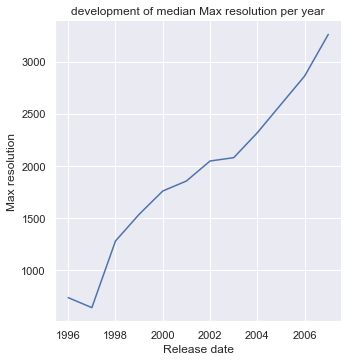

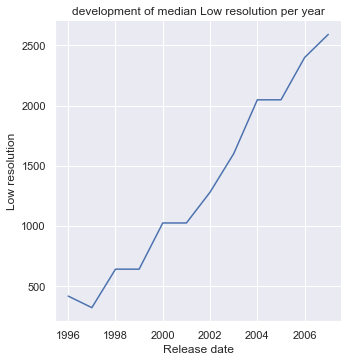

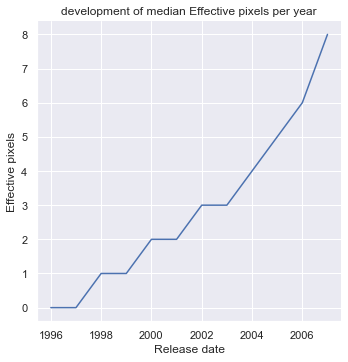

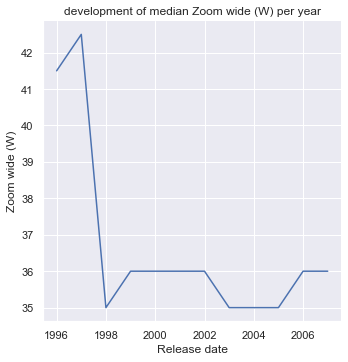

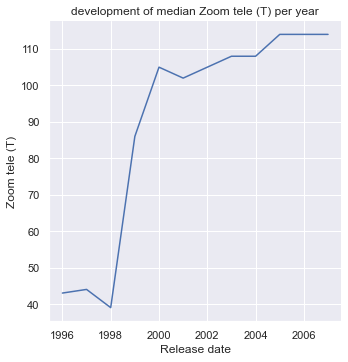

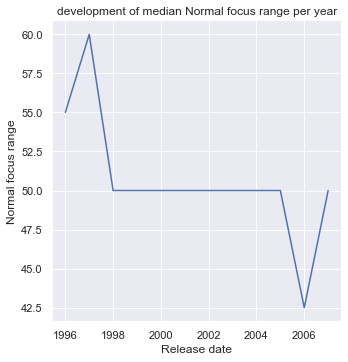

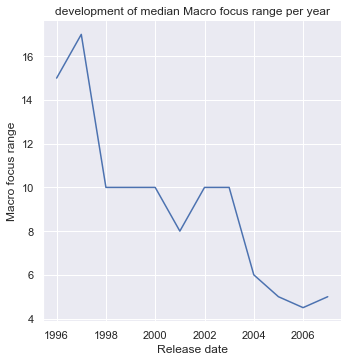

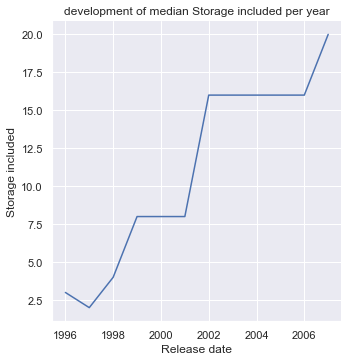

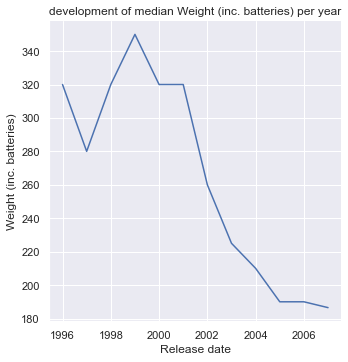

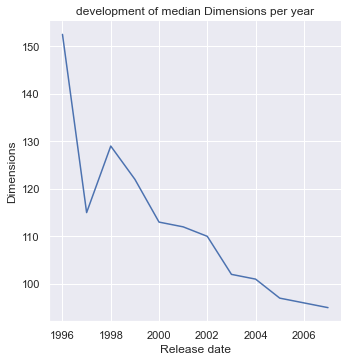

In [11]:
#plotting different properties and their development over time - taking the median as the 0 values would bias the mean
for properties in columns_without_price_date_model :
    sns.relplot(x = "Release date", y = f"{properties}", data = median_camera, kind = "line")
    plt.title(f"development of median {properties} per year")
    plt.show


We saw that development of max and low resolution, effective pixels per year, zoom tele and storage included, all increased over time.

At the same time zoom wide, normal focus range, macro focus range, weight development and the dimensions of cameras had downward trends.
Intuitively the downward trend for weight and dimensions development make sense, as due to technological advancements cameras have become lighter and smaller. 
It is interesting though, that we found most zero values in the columns: zoom wide, zoom tele, normal focus range, macro focus range, storage included. Interestingly these properties - except for storage included - are mostly enhanced by interchangeable lenses that have to be bought additionally to the camera. It could be a hypothesis, that companies have increasingly released interchangeable lenses, while the previously mentioned properties have decreased in performance. In order to find this out we would need more data about interchangeable camera lenses.

Now we are going to check if there is a relationship between the different properties and the price of a camera.

The lowest price is 14.0
The lowest price is 7999.0
The mean price is 459.0998062015504
The median price is 199.0
The standard deviation price is 762.3262033221365


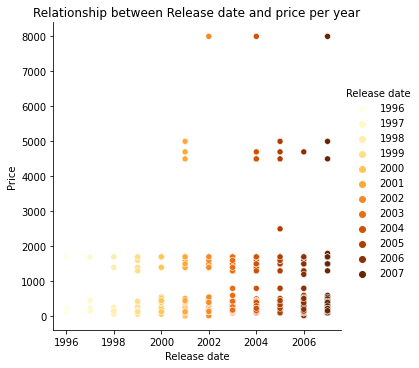

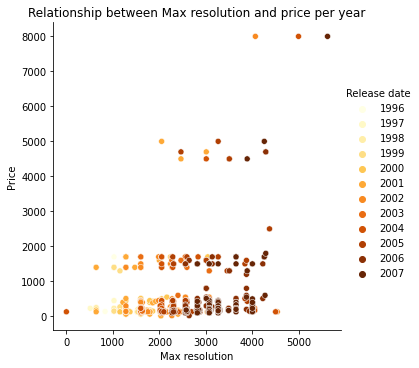

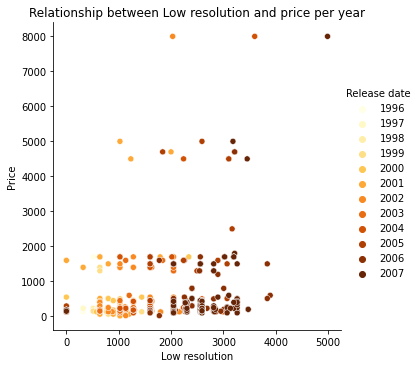

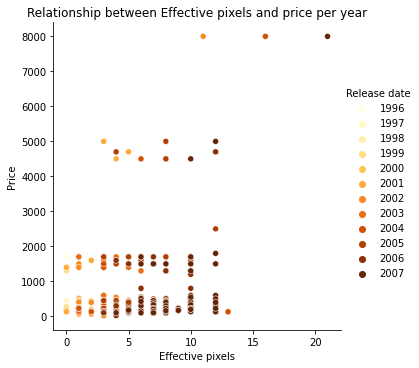

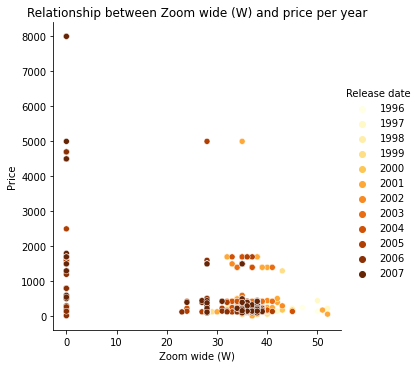

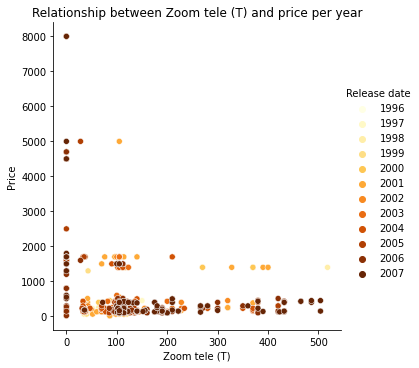

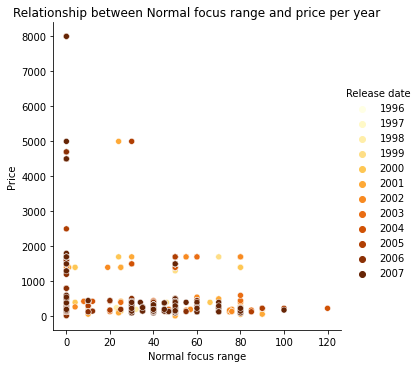

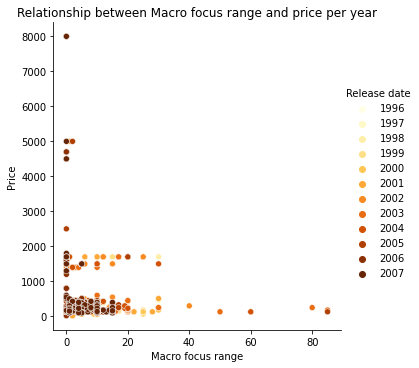

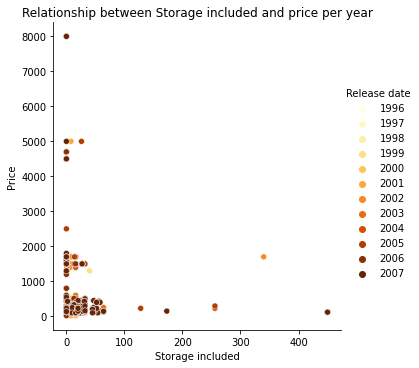

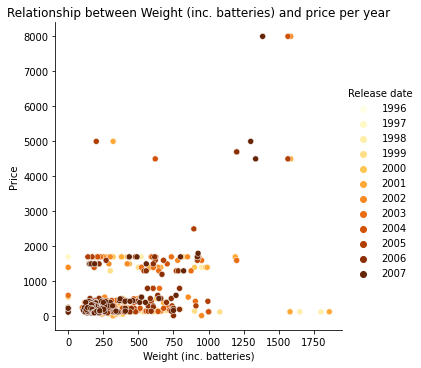

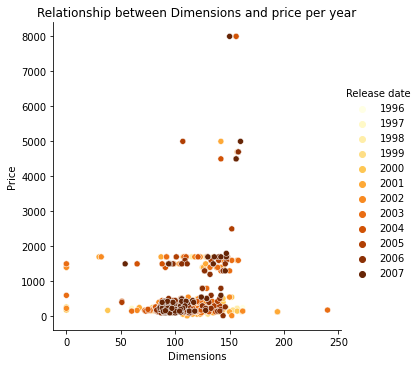

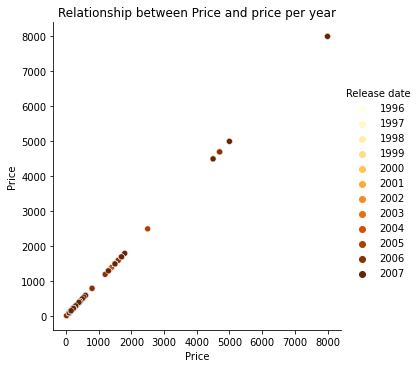

In [6]:
#list with columns
columns_without_model = []

#look at the highest and the lowest price
min_price_camera = camera_sorted["Price"].min()
max_price_camera= camera_sorted["Price"].max()
mean_price_camera = camera_sorted["Price"].mean()
median_price_camera = camera_sorted["Price"].median()
std_price_camera = camera_sorted["Price"].std()

print(f"The lowest price is {min_price_camera}")
print(f"The lowest price is {max_price_camera}")
print(f"The mean price is {mean_price_camera}")
print(f"The median price is {median_price_camera}")
print(f"The standard deviation price is {std_price_camera}")

#exclude columns release date and model
for column in camera_sorted.columns :
        if column != "Model":
            columns_without_model.append(column)

#make scatterplots for propertiess
for properties in columns_without_model :

    sns.relplot(x = f"{properties}" , y = "Price", data = camera_sorted, kind = "scatter", hue = "Release date", legend='full', palette = "YlOrBr")
    plt.title(f"Relationship between {properties} and price per year")
    plt.show

Interestingly the scatterplots seem to have similar patterns. There are a some extreme outliers though for datapoints that have a price above 2000. Also we can observe, that properties as 
e.g. effective pixels have increased in time, while the prices have stayed relatively constant.
As we can see that the prices stay relatively constant, it would be an interesting question, whether this comes from the decreases and increase in some properties as we saw earlier or due to technological advancement. To find this out, we would need more data.

It is also interesting that there seems to be a gap between cameras that cost less than 1000$ and cameras, that are more than 1000$. At the same time it looks like even with the price differences, most of the cameras have the same quality in properties. Meaning that price is not necessarily a factor for quality. 

Next we look whether there is a correlation between release date and the properties.

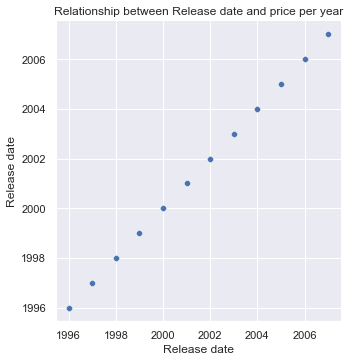

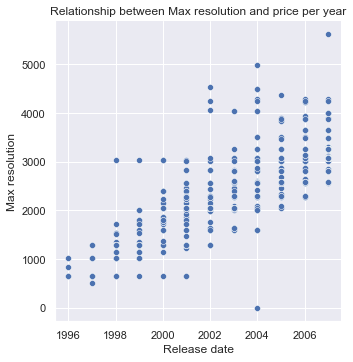

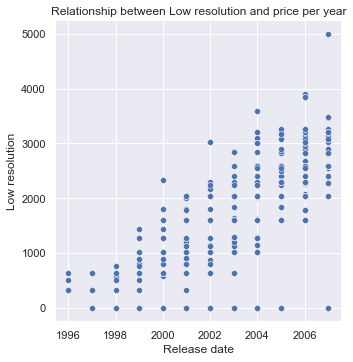

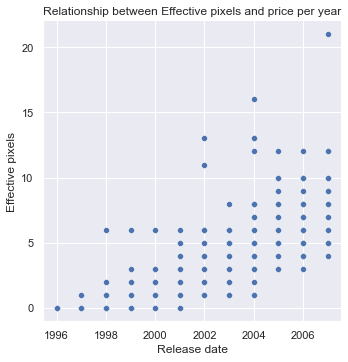

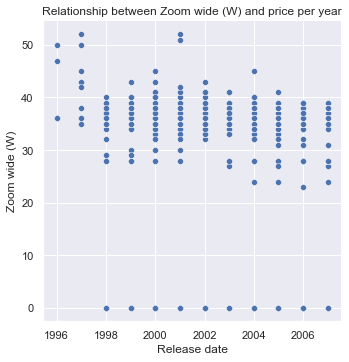

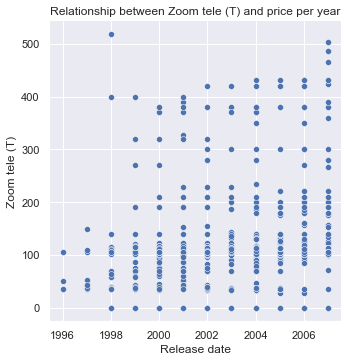

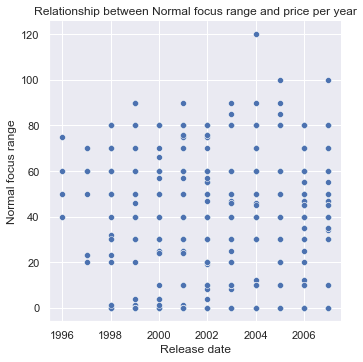

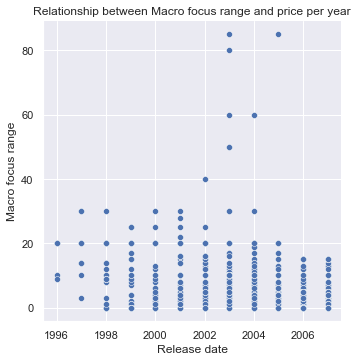

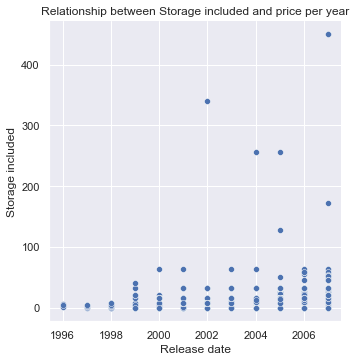

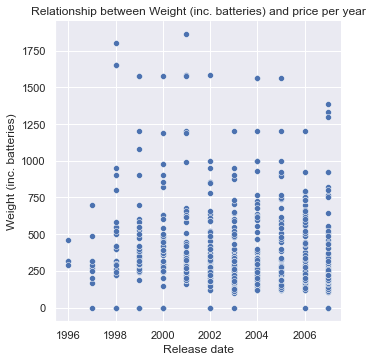

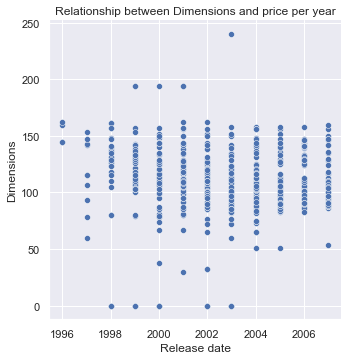

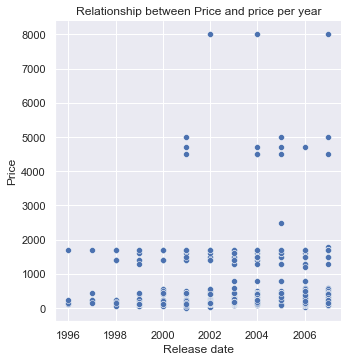

In [13]:
for properties in columns_without_model :

    sns.relplot(x = "Release date" , y = f"{properties}", data = camera_sorted, kind = "scatter", legend='full', palette = "YlOrBr")
    plt.title(f"Relationship between release date and {properties}")
    plt.show

It looks as if there was a linear relationship between the release date of a camera and its resolution and pixels. We can see if they correlate via plotting a correlation matrix.



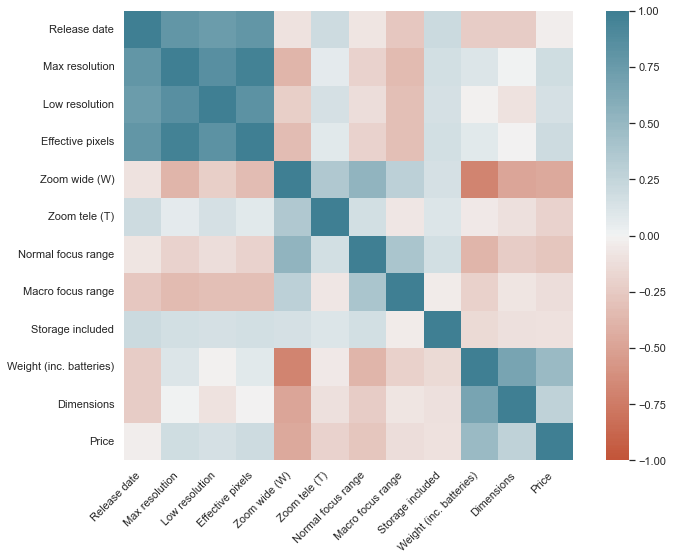

In [16]:
corr = camera_sorted.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In the correlation matrix we can clearly see that release date is correlated to resolution and effective pixels.

Next we can visualize how many brands are in the dataset and how many cameras they released and how the companies differ in price.

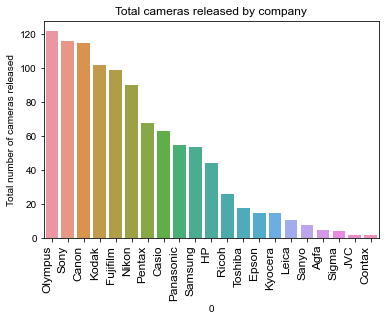

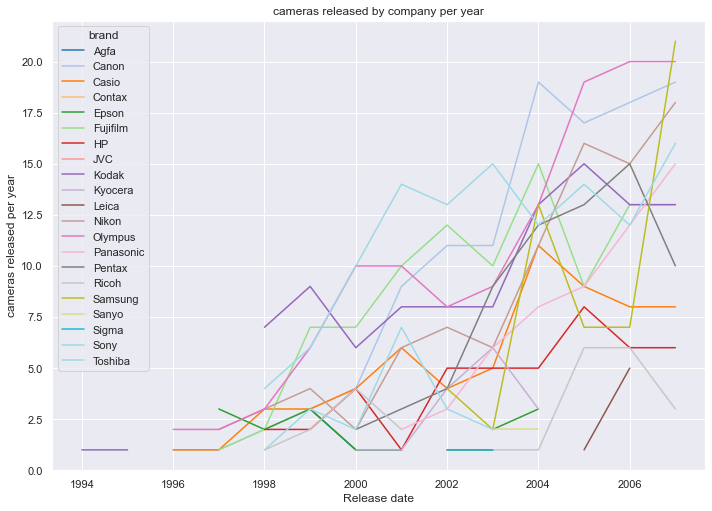

In [7]:
#split the Brand from the model name
camera_brands = camera_new["Model"].str.split(" ", n = 1, expand = True)

#count how many cameras there are per brand
camera_brands["count"] = camera_brands[0].count()

#make countplot from brands
countplot_brands = sns.countplot(x = camera_brands[0], data = camera_brands, order = camera_brands[0].value_counts().index)

plt.title(f"Total cameras released by company")

#styling
countplot_brands.set_xticklabels(countplot_brands.get_xticklabels(), 
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',)

plt.ylabel('Total number of cameras released')

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

#making column in camera_new with brands
camera_new["brand"] = camera_brands[0]

camera_new.groupby(['Release date','brand'])["brand"].count().unstack().plot(colormap= "tab20")
plt.title(f"cameras released by company per year")
plt.ylabel("cameras released per year")
plt.show()



# #group cameras by year by brand
# camera_group_brands = camera_new.groupby(["Release date", "brand"]).count()

# pd.set_option('display.max_rows', 500)

# camera_group_brands



We can see, that Olympus, Sony and Canon are the top three companies in terms of most released cameras.
When we look at the grouped plot it takes some time to identify the brand and its graph but here we can see that e.g. Samsung has a steep increase in camera releases from 2006 to 2007.
It would be interesting to see how many and if these companies are still releasing cameras today. But here we would also need more data to find that out.

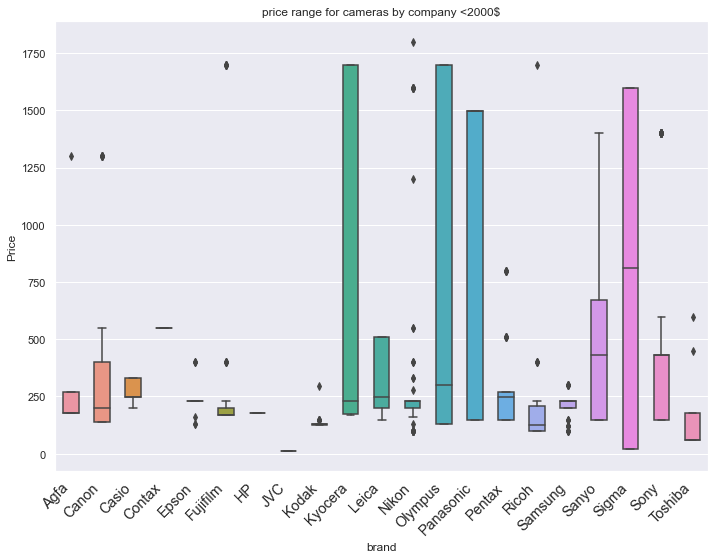

In [8]:
#exclude prices above 2000 dollar to make distribution more visble
camera_excluded = camera_new[camera_new['Price'] <= 2000]  

#boxplot to show distribution of price in brands
boxplot_brand = sns.boxplot(x = "brand", y = "Price", data = camera_excluded, width=0.5)
plt.title(f"price range for cameras by company <2000$")
boxplot_brand.set_xticklabels(boxplot_brand.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large',)

sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

In the boxplot chart, we can see that the biggest camera companies: canon and sony have a relatively small price range, while olympus has a relatively bigger one.

Next we have a look on the distribution of the data

/var/folders/ld/36b_mxhn7rsfrn433vqc3ypr0000gn/T/ipykernel_57738/438358205.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  camera_sorted_without_release = camera_sorted.drop("Release date", 1)


Model                       object
Max resolution             float64
Low resolution             float64
Effective pixels           float64
Zoom wide (W)              float64
Zoom tele (T)              float64
Normal focus range         float64
Macro focus range          float64
Storage included           float64
Weight (inc. batteries)    float64
Dimensions                 float64
Price                      float64
dtype: object


array([[<AxesSubplot:title={'center':'Max resolution'}>,
        <AxesSubplot:title={'center':'Low resolution'}>,
        <AxesSubplot:title={'center':'Effective pixels'}>],
       [<AxesSubplot:title={'center':'Zoom wide (W)'}>,
        <AxesSubplot:title={'center':'Zoom tele (T)'}>,
        <AxesSubplot:title={'center':'Normal focus range'}>],
       [<AxesSubplot:title={'center':'Macro focus range'}>,
        <AxesSubplot:title={'center':'Storage included'}>,
        <AxesSubplot:title={'center':'Weight (inc. batteries)'}>],
       [<AxesSubplot:title={'center':'Dimensions'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

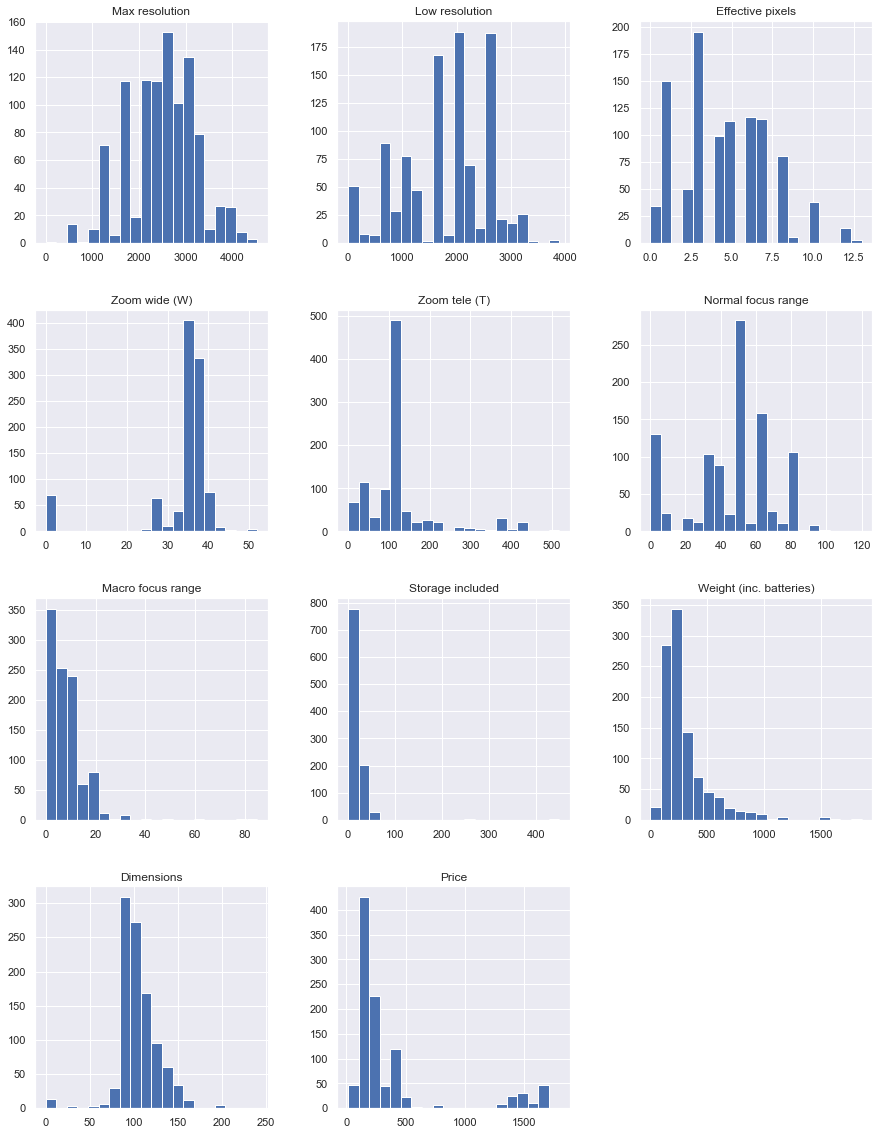

In [9]:
#take out release date
camera_sorted_without_release = camera_sorted.drop("Release date", 1)

#take out rows with price bigger than 2000
camera_sorted_without_release = camera_sorted_without_release[camera_sorted_without_release['Price'] <= 2000]  

print(camera_sorted_without_release.dtypes)

# Plot the histograms
camera_sorted_without_release.hist(bins = 20, figsize = (15,20))


In general we have gotten a broad overview about the camera dataset. We have learned, that there have been some in- and decreases in camera properties over time. Some of these decreases could be explained by an increasing market for interchangeable camera lenses. To proof this hypothesis we would need more data.
Also we saw, that cameras with a higher price could have actually the same properties as a camera with a lower price. That means that price is not always an indicator for a better camera.
It would be interesting to see how the properties have evolved until now and if the price dynamic has changed.
Unfortunately the data was not normally distributed, so that it did not make sense to apply a linear Regression model for price forecasting.